In [1]:
import numpy as np
import xarray
import matplotlib.pyplot as plt
hfont = {'fontname':'Helvetica'}

In [2]:
# open data files:
model_data = xarray.open_dataarray('Beijing_rcp45_MEAN_bias_corr.nc')
model_data = model_data - 273.15 #convert to Celsius

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


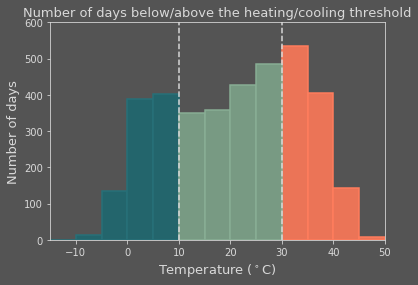

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1)

    # Set Colours:
fig.patch.set_facecolor('0.33') #grey
ax.set_facecolor('0.33') #grey
ax.tick_params(colors = '0.85', labelcolor = '0.85')

    # Axes colours:
ax.spines['bottom'].set_color('0.85')
ax.spines['top'].set_color('0.85') 
ax.spines['right'].set_color('0.85')
ax.spines['left'].set_color('0.85')
    #Axes limits:
plt.xlim((-15,50))
plt.ylim((0,600))

    #Labels & title:
ax.set_xlabel('Temperature ($^\circ$C)',color = '0.85', fontsize = 13, **hfont)
ax.set_ylabel('Number of days',color = '0.85', fontsize = 13, **hfont)
ax.set_title('Number of days below/above the heating/cooling threshold',color = '0.85', fontsize = 13, **hfont)

    #Bins:
bins = [-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50]

bins1 = [-15,-10,-5,0,5,10]
bins2 = [10,15,20,25,30]
bins3 = [25,30,35,40,45,50]

data1 = model_data.where(model_data < 10)
data1 = data1.dropna(dim = 'time').values
data2 = model_data.where((model_data > 10) & (model_data < 30))
data2 = data2.dropna(dim = 'time').values
data3 = model_data.where(model_data >30)
data3 = data3.dropna(dim = 'time').values


plt.hist(data1, bins1, edgecolor='#277078', linewidth=1.5, color = '#23656c')
plt.hist(data3, bins3, edgecolor='#ff7d5d', linewidth=1.5, color = '#eb7457')
plt.hist(data2, bins2, edgecolor='#89ae95', linewidth=1.5, color = '#789a83')
    #Threshold Lines:
plt.vlines(30, ymin = 0, ymax = 600, color = '0.85',linestyles='dashed')
plt.vlines(10, ymin = 0, ymax = 600, color = '0.85',linestyles='dashed')



(array([  0.,  14., 134., 389., 403., 350., 358., 428., 485., 535., 404.,
        143.,   7.]),
 array([-15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,  40,  45,
         50]),
 <a list of 13 Patch objects>)

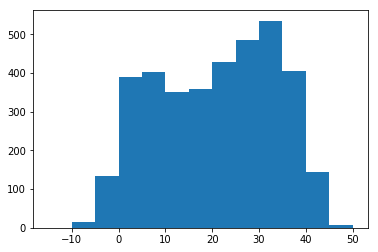

In [84]:
bins = [-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50]
plt.hist(model_data, bins)